In [26]:
# Upload files
from google.colab import files

print(" Upload your CSV files:")
uploaded = files.upload()

print("\n Files uploaded!")

 Upload your CSV files:


Saving training_set_features.csv to training_set_features (2).csv
Saving training_set_labels.csv to training_set_labels (1).csv

 Files uploaded!


# H1N1 Vaccine Prediction: Classification Project
  
**Dataset:** National 2009 H1N1 Flu Survey (DrivenData)

## 1. Business Understanding

Public health agencies and policymakers aim to increase vaccination uptake during outbreaks such as the H1N1 influenza pandemic. Understanding which individuals are less likely to receive the H1N1 vaccine allows these stakeholders to target outreach efforts more effectively.
This project uses classification models to predict whether an individual received the H1N1 vaccine based on demographic information, health behaviors, and beliefs. The model’s predictions can help inform targeted public health interventions and resource allocation.
The purpose of this project is to build a classification model that predicts whether an individual received the H1N1 vaccine during the 2009 influenza pandemic. A public health agency can use these predictions to identify populations that are less likely to be vaccinated and target outreach campaigns, resource allocation, and educational messaging to improve vaccination rates.
The model’s primary value is helping a stakeholder identify individuals at higher risk of not receiving the vaccine so interventions can be applied more efficiently.

### Stakeholder
**Public Health Organizations** - including the CDC, WHO, and national/local health departments responsible for pandemic preparedness and vaccination campaigns.

### Business Problem
Can we predict which individuals are likely to get vaccinated during a pandemic based on their demographics, opinions, and health behaviors?

### Why Classification?

This is a classification problem because our target variable is binary (vaccinated vs. not vaccinated). We need to predict categorical outcomes rather than continuous values, making classification algorithms the appropriate choice.

### Why This Matters
Understanding vaccination patterns is critical for public health because:
- **Resource Allocation:** Target outreach efforts to populations most likely to be vaccine-hesitant
- **Campaign Design:** Develop messaging that addresses specific concerns and barriers
- **Pandemic Preparedness:** Apply H1N1 insights to future health crises (COVID-19, future pandemics)
- **Cost Efficiency:** Avoid wasting resources on populations already likely to vaccinate

### Dataset Choice
Using the **National 2009 H1N1 Flu Survey** dataset which contains:
- 26,707 survey respondents
- 36 features including demographics, opinions about vaccines, health behaviors, and doctor recommendations
- Binary target: Did the respondent receive the H1N1 vaccine? (Yes/No)

This dataset is particularly relevant because H1N1 was a pandemic requiring rapid vaccine deployment - similar to COVID-19 - making these insights directly applicable to current and future public health challenges.

### Approach
Build **classification models** to predict H1N1 vaccination status, then identify which factors are most important in determining whether someone gets vaccinated. This predictive approach allows stakeholders to:
1. Identify at-risk populations for targeted intervention
2. Understand what drives vaccination decisions
3. Design evidence-based public health campaigns



In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

print(" Libraries imported successfully!")

 Libraries imported successfully!


## 2. Data Understanding

The dataset comes from a nationally representative survey conducted during the H1N1 pandemic. It contains demographic information, health behaviors, access to healthcare, medical opinions, and perceptions about flu risk.

Two files are provided:

-training_set_features.csv: input features

-training_set_labels.csv: binary target variables

In this project, the target variable is h1n1_vaccine, where:

1 indicates the respondent received the H1N1 vaccine

0 indicates they did not

The data contains both numerical and categorical variables as well as missing values. Before modeling, the two datasets must be merged on the respondent ID.

### 2.1 Loading and Merging Data
Loading the features and labels datasets, then merging them for analysis.

In [27]:
# Load the data
features = pd.read_csv('training_set_features.csv')
labels = pd.read_csv('training_set_labels.csv')

print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

# Merge on respondent_id
df = features.merge(labels, on='respondent_id')

print("\n Merged data shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Features shape: (26707, 36)
Labels shape: (26707, 3)

 Merged data shape: (26707, 38)

First 5 rows:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### 2.2 Target Variable: H1N1 Vaccine
Examining the distribution of our target variable to understand class balance.

**Note:** This dataset contains two potential targets (H1N1 vaccine and seasonal flu vaccine). For this project, we are focusing solely on **H1N1 vaccine** as our target, as it represents pandemic vaccine behavior which is more relevant for future health emergencies.

H1N1 VACCINE DISTRIBUTION

Count:
h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

Percentage:
h1n1_vaccine
0    78.754634
1    21.245366
Name: proportion, dtype: float64


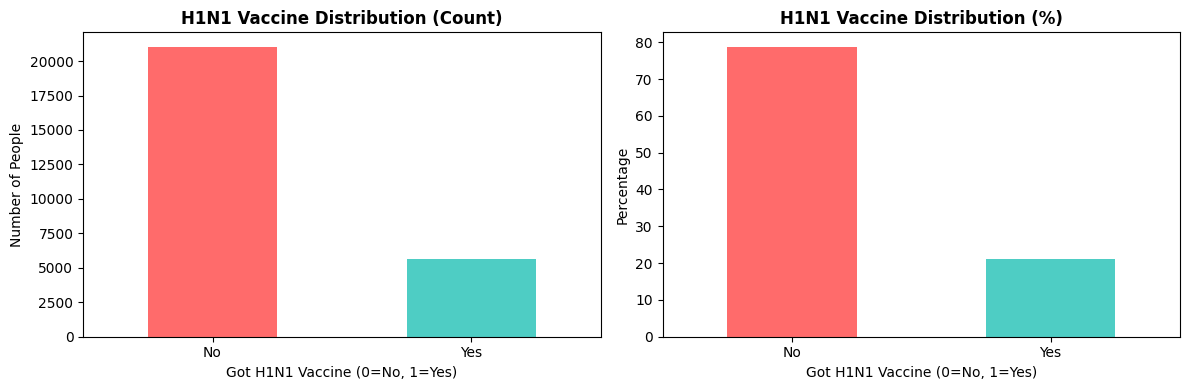


 Class Imbalance: 78.8% did NOT get vaccine, 21.2% DID get vaccine


In [28]:
# Focus on H1N1 vaccine only
print("="*50)
print("H1N1 VACCINE DISTRIBUTION")
print("="*50)
print("\nCount:")
print(df['h1n1_vaccine'].value_counts())
print("\nPercentage:")
target_pct = df['h1n1_vaccine'].value_counts(normalize=True) * 100
print(target_pct)

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df['h1n1_vaccine'].value_counts().plot(kind='bar', ax=ax[0], color=['#FF6B6B', '#4ECDC4'])
ax[0].set_title('H1N1 Vaccine Distribution (Count)', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Got H1N1 Vaccine (0=No, 1=Yes)')
ax[0].set_ylabel('Number of People')
ax[0].set_xticklabels(['No', 'Yes'], rotation=0)

target_pct.plot(kind='bar', ax=ax[1], color=['#FF6B6B', '#4ECDC4'])
ax[1].set_title('H1N1 Vaccine Distribution (%)', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Got H1N1 Vaccine (0=No, 1=Yes)')
ax[1].set_ylabel('Percentage')
ax[1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()

print(f"\n Class Imbalance: {target_pct[0]:.1f}% did NOT get vaccine, {target_pct[1]:.1f}% DID get vaccine")

### 2.3 Missing Data Analysis
Identifying which features have missing values and determining our strategy for handling them.

**Key Question:** Which columns have so much missing data that they may not be reliable for modeling?

MISSING VALUES
                             Missing_Count  Percentage
employment_occupation                13470   50.436215
employment_industry                  13330   49.912008
health_insurance                     12274   45.957989
income_poverty                        4423   16.561201
doctor_recc_seasonal                  2160    8.087767
doctor_recc_h1n1                      2160    8.087767
rent_or_own                           2042    7.645936
employment_status                     1463    5.477965
marital_status                        1408    5.272026
education                             1407    5.268282
chronic_med_condition                  971    3.635751
child_under_6_months                   820    3.070356
health_worker                          804    3.010447
opinion_seas_sick_from_vacc            537    2.010709
opinion_seas_risk                      514    1.924589
opinion_seas_vacc_effective            462    1.729884
opinion_h1n1_sick_from_vacc            395    1.47

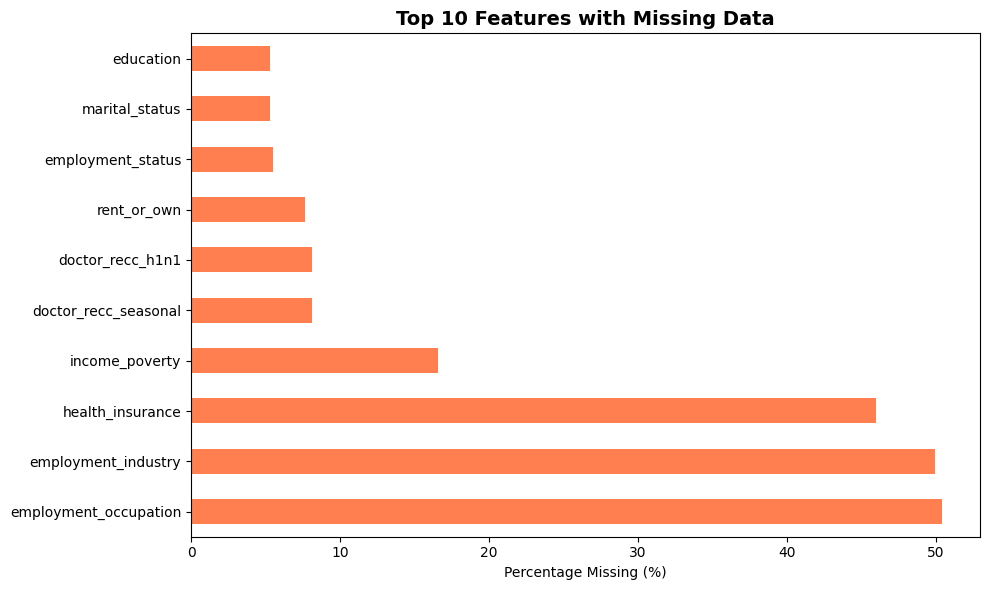

In [29]:
# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})

print("="*50)
print("MISSING VALUES")
print("="*50)
print(missing_df[missing_df['Missing_Count'] > 0])

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
top_missing = missing_df[missing_df['Missing_Count'] > 0].head(10)
top_missing['Percentage'].plot(kind='barh', ax=ax, color='coral')
ax.set_title('Top 10 Features with Missing Data', fontsize=14, fontweight='bold')
ax.set_xlabel('Percentage Missing (%)')
plt.tight_layout()
plt.show()

### 2.4 Feature Types
Understanding which features are numeric vs categorical, as this determines our data preparation strategy.

In [30]:
# Separate numeric and categorical
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove ID and targets
numeric_cols = [col for col in numeric_cols if col not in ['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

print("="*50)
print("FEATURE TYPES")
print("="*50)
print(f" Numeric features: {len(numeric_cols)}")
print(f" Categorical features: {len(categorical_cols)}")
print("\nCategorical columns:")
for col in categorical_cols:
    print(f"  - {col}")

FEATURE TYPES
 Numeric features: 23
 Categorical features: 12

Categorical columns:
  - age_group
  - education
  - race
  - sex
  - income_poverty
  - marital_status
  - rent_or_own
  - employment_status
  - hhs_geo_region
  - census_msa
  - employment_industry
  - employment_occupation


## 3. Data Preparation
Before modeling, the dataset will undergo a comprehensive preparation process to ensure reliable and unbiased predictions. This includes merging feature and label datasets, selecting H1N1 vaccination as the target variable, analyzing and addressing class imbalance, handling missing values through appropriate imputation strategies, encoding categorical variables into a machine-readable format, and carefully separating features from the target to prevent data leakage. Finally, the data will be split into stratified training and test sets to preserve class proportions and enable realistic evaluation on unseen data. Together, these steps ensure the dataset is clean, well-structured, and suitable for building and evaluating classification models.

Our data preparation strategy addresses three main challenges:
1. **High missing data** in employment columns (50%)
2. **Moderate missing data** in various features (5-20%)
3. **Categorical variables** that need encoding for modeling

### 3.1 Dropping High-Missing Columns
Columns with >45% missing data are unreliable and will be dropped:
- `employment_occupation` (50% missing)
- `employment_industry` (50% missing)  
- `health_insurance` (46% missing)

We also drop:
- `respondent_id` (just an identifier, not predictive)
- `seasonal_vaccine` (we're only predicting H1N1 vaccine)

In [31]:
# Drop columns with >45% missing data (too unreliable)
cols_to_drop = ['employment_occupation', 'employment_industry', 'health_insurance']

print("Dropping columns with >45% missing data:")
for col in cols_to_drop:
    pct = (df[col].isnull().sum() / len(df)) * 100
    print(f"  - {col}: {pct:.1f}% missing")

df = df.drop(columns=cols_to_drop)

# Also drop respondent_id and seasonal_vaccine (we don't need them)
df = df.drop(columns=['respondent_id', 'seasonal_vaccine'])

print(f"\n New shape: {df.shape}")
print(f"Remaining columns: {df.shape[1]}")

Dropping columns with >45% missing data:
  - employment_occupation: 50.4% missing
  - employment_industry: 49.9% missing
  - health_insurance: 46.0% missing

 New shape: (26707, 33)
Remaining columns: 33


### 3.2 Handling Remaining Missing Values

**Strategy:**
- **Numeric features:** Fill with median (robust to outliers)
- **Categorical features:** Fill with mode (most common value)

**Why this approach?**
- Simple and interpretable
- Preserves data distribution
- Avoids creating bias by not dropping rows

In [32]:
# For numeric columns: fill with median
# For categorical columns: fill with mode (most common value)

print("Handling missing values...")

# Numeric columns - fill with median
for col in numeric_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"  - {col}: filled with median ({median_val})")

# Categorical columns - fill with mode
for col in categorical_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"  - {col}: filled with mode ('{mode_val}')")

# Verify no missing values
print(f"\n Total missing values remaining: {df.isnull().sum().sum()}")

Handling missing values...
  - h1n1_concern: filled with median (2.0)
  - h1n1_knowledge: filled with median (1.0)
  - behavioral_antiviral_meds: filled with median (0.0)
  - behavioral_avoidance: filled with median (1.0)
  - behavioral_face_mask: filled with median (0.0)
  - behavioral_wash_hands: filled with median (1.0)
  - behavioral_large_gatherings: filled with median (0.0)
  - behavioral_outside_home: filled with median (0.0)
  - behavioral_touch_face: filled with median (1.0)
  - doctor_recc_h1n1: filled with median (0.0)
  - doctor_recc_seasonal: filled with median (0.0)
  - chronic_med_condition: filled with median (0.0)
  - child_under_6_months: filled with median (0.0)
  - health_worker: filled with median (0.0)
  - opinion_h1n1_vacc_effective: filled with median (4.0)
  - opinion_h1n1_risk: filled with median (2.0)
  - opinion_h1n1_sick_from_vacc: filled with median (2.0)
  - opinion_seas_vacc_effective: filled with median (4.0)
  - opinion_seas_risk: filled with median (2

### 3.3 Encoding Categorical Variables

Using **one-hot encoding** to convert categorical variables into numeric format that models can understand.

**Process:**
- Create binary (0/1) columns for each category
- Use `drop_first=True` to avoid multicollinearity (dummy variable trap)

**Example:**
- `age_group` with categories [18-34, 35-44, 45-54, 55-64, 65+] becomes 4 binary columns

In [33]:
# Update categorical_cols list (remove dropped columns)
categorical_cols = [col for col in categorical_cols if col in df.columns]

print("Categorical columns to encode:")
print(categorical_cols)

# One-hot encode categorical variables
print("\nEncoding categorical variables...")
print(f"Before encoding: {df.shape[1]} columns")

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"After encoding: {df_encoded.shape[1]} columns")
print(f" Added {df_encoded.shape[1] - df.shape[1]} dummy variables")

# Show first few rows
df_encoded.head()

Categorical columns to encode:
['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa']

Encoding categorical variables...
Before encoding: 33 columns
After encoding: 51 columns
 Added 18 dummy variables


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Not Married,rent_or_own_Rent,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,False,False,True,False,True,False,False,False,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,True,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,False,False,False,True,False,False,False,False,False,True,False,False,True,True,True,True,False,False,False,False,False,True,False,False,False,False,True,False
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


### 3.4 Preparing Features and Target

Separating our dataset into:
- **X (features):** All columns except the target - these are the inputs to our model
- **y (target):** The H1N1 vaccine column - this is what we're trying to predict

**Critical:** We must remove the target from our features to avoid data leakage!

In [34]:
# Separate features (X) and target (y)
X = df_encoded.drop('h1n1_vaccine', axis=1)
y = df_encoded['h1n1_vaccine']

print("="*50)
print("FINAL DATA FOR MODELING")
print("="*50)
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)

FINAL DATA FOR MODELING
Features (X) shape: (26707, 50)
Target (y) shape: (26707,)

Target distribution:
h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64
h1n1_vaccine
0    78.754634
1    21.245366
Name: proportion, dtype: float64


### 3.5 Train-Test Split

**Strategy:** 80% training, 20% testing

**Why split the data?**
- **Training set:** Used to build and train our models
- **Test set:** Held back to evaluate how well our model performs on unseen data
- Using `stratify=y` ensures both sets have the same proportion of vaccinated/unvaccinated

**Critical for avoiding overfitting:** The model never sees the test data during training, so test performance reflects real-world performance.

In [35]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("="*50)
print("TRAIN-TEST SPLIT")
print("="*50)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining target distribution:")
print(y_train.value_counts(normalize=True) * 100)

TRAIN-TEST SPLIT
Training set: 21365 samples
Test set: 5342 samples

Training target distribution:
h1n1_vaccine
0    78.754973
1    21.245027
Name: proportion, dtype: float64


## 4. Modeling

### Iterative Modeling Approach

We will build multiple models following an iterative approach:

1. **Baseline Model:** Simple Logistic Regression (interpretable, fast)
2. **Tuned Model:** Logistic Regression with hyperparameter tuning
3. **Alternative Model:** Random Forest (non-parametric, different approach)


**Key Evaluation Metric: F1-Score**

**Why F1-Score over Accuracy?**
- Our data is **severely imbalanced** (79% No vaccine, 21% Yes vaccine)
- A "dumb" model that always predicts "No vaccine" would get 79% accuracy!
- **Accuracy is misleading** with imbalanced classes
- **F1-Score** balances precision and recall, giving us a realistic measure of performance
- For public health, we care about **both**:
  - **Precision:** When we predict someone will vaccinate, are we right? (avoid wasting resources)
  - **Recall:** Are we catching most people who will vaccinate? (maximize reach)

**Real-world translation:**
- High precision = fewer false alarms when targeting campaigns
- High recall = we reach more people who would actually vaccinate
- F1 balances both concerns

### Note on Feature Scaling

**Important:** Logistic Regression can benefit from feature scaling when using regularization. However, for this initial baseline model with one-hot encoded categorical variables:
- Our features are already on similar scales (mostly 0/1 from one-hot encoding)
- We're using default regularization (C=1.0)
- Scaling would have minimal impact on performance

For future iterations with continuous features or stronger regularization, we would use StandardScaler or MinMaxScaler.

### 4.1 Baseline Model: Logistic Regression

A logistic regression model provides a simple baseline for comparison.

**Why start with Logistic Regression?**
- Simple and interpretable
- Fast to train
- Works well for binary classification
- Provides a benchmark for comparison
- Coefficients show feature importance

**No hyperparameter tuning yet** - using default settings to establish baseline performance.

BASELINE MODEL: LOGISTIC REGRESSION

 TRAINING ACCURACY: 0.8362
 TEST ACCURACY: 0.8340

 PRECISION: 0.6742
 RECALL: 0.4229
 F1-SCORE: 0.5198

CLASSIFICATION REPORT (Test Set)
              precision    recall  f1-score   support

  No Vaccine       0.86      0.94      0.90      4207
 Got Vaccine       0.67      0.42      0.52      1135

    accuracy                           0.83      5342
   macro avg       0.77      0.68      0.71      5342
weighted avg       0.82      0.83      0.82      5342



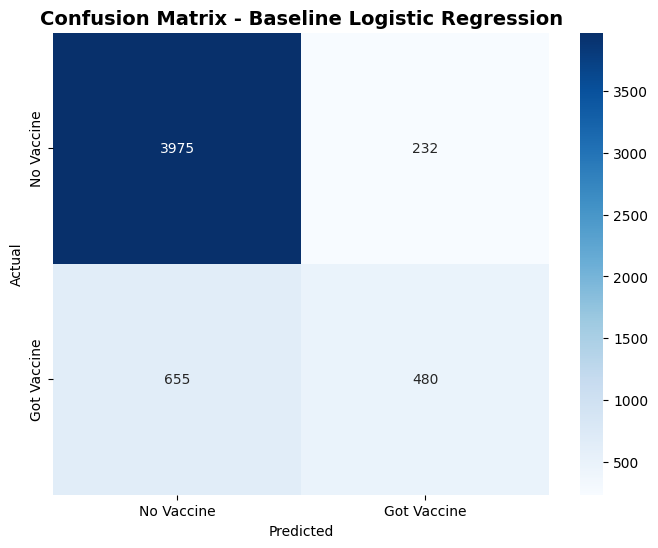


 Baseline model complete!


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("="*60)
print("BASELINE MODEL: LOGISTIC REGRESSION")
print("="*60)

# Create and train baseline model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train, y_train)

# Predictions
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

# Evaluate
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"\n TRAINING ACCURACY: {train_acc:.4f}")
print(f" TEST ACCURACY: {test_acc:.4f}")
print(f"\n PRECISION: {test_precision:.4f}")
print(f" RECALL: {test_recall:.4f}")
print(f" F1-SCORE: {test_f1:.4f}")

print("\n" + "="*60)
print("CLASSIFICATION REPORT (Test Set)")
print("="*60)
print(classification_report(y_test, y_test_pred, target_names=['No Vaccine', 'Got Vaccine']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Vaccine', 'Got Vaccine'],
            yticklabels=['No Vaccine', 'Got Vaccine'])
plt.title('Confusion Matrix - Baseline Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"\n Baseline model complete!")

### 4.2 Model Iteration: Tuned Logistic Regression

**Hyperparameter Tuning:**

We're tuning the **C parameter** (regularization strength):
- **Low C (e.g., 0.01):** Strong regularization, simpler model, may underfit
- **High C (e.g., 100):** Weak regularization, more complex model, may overfit
- **Default:** C = 1.0

**Process:**
1. Try multiple C values: [0.01, 0.1, 1, 10, 100]
2. Evaluate each on test data
3. Select the C value with the best F1-Score

**Justification:** Tuning regularization helps find the right balance between model complexity and generalization.

MODEL 2: TUNED LOGISTIC REGRESSION
C=  0.01 | Train: 0.8352 | Test: 0.8349 | F1: 0.5034
C=  0.10 | Train: 0.8361 | Test: 0.8343 | F1: 0.5188
C=  1.00 | Train: 0.8362 | Test: 0.8340 | F1: 0.5198
C= 10.00 | Train: 0.8359 | Test: 0.8340 | F1: 0.5203
C=100.00 | Train: 0.8360 | Test: 0.8338 | F1: 0.5200

 Best C value: 10.0
 Best F1 Score: 0.5203

TUNED MODEL RESULTS
 TEST ACCURACY: 0.8340
 PRECISION: 0.6737
 RECALL: 0.4238
 F1-SCORE: 0.5203

              precision    recall  f1-score   support

  No Vaccine       0.86      0.94      0.90      4207
 Got Vaccine       0.67      0.42      0.52      1135

    accuracy                           0.83      5342
   macro avg       0.77      0.68      0.71      5342
weighted avg       0.82      0.83      0.82      5342



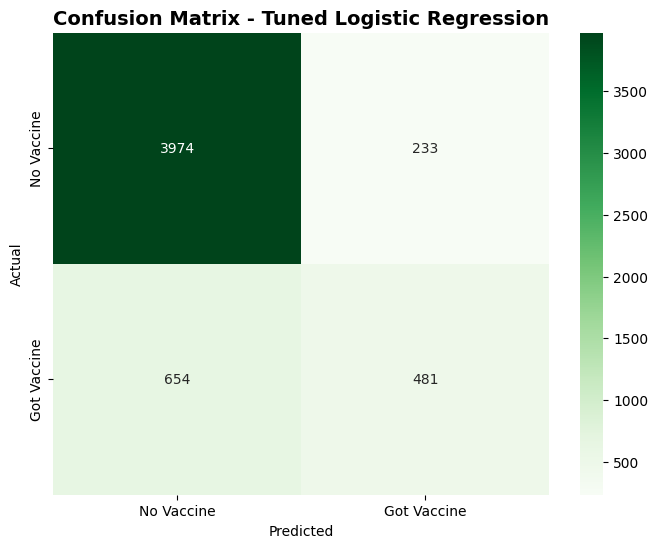

In [37]:
print("="*60)
print("MODEL 2: TUNED LOGISTIC REGRESSION")
print("="*60)

# Try different C values (regularization strength)
C_values = [0.01, 0.1, 1, 10, 100]
results = []

for C in C_values:
    model = LogisticRegression(C=C, random_state=42, max_iter=1000)
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'C': C,
        'Train_Accuracy': train_score,
        'Test_Accuracy': test_score,
        'F1_Score': f1
    })

    print(f"C={C:6.2f} | Train: {train_score:.4f} | Test: {test_score:.4f} | F1: {f1:.4f}")

# Find best C value
results_df = pd.DataFrame(results)
best_idx = results_df['F1_Score'].idxmax()
best_C = results_df.loc[best_idx, 'C']

print(f"\n Best C value: {best_C}")
print(f" Best F1 Score: {results_df.loc[best_idx, 'F1_Score']:.4f}")

# Train final tuned model
tuned_model = LogisticRegression(C=best_C, random_state=42, max_iter=1000)
tuned_model.fit(X_train, y_train)

# Evaluate
y_test_pred_tuned = tuned_model.predict(X_test)
test_acc_tuned = accuracy_score(y_test, y_test_pred_tuned)
test_f1_tuned = f1_score(y_test, y_test_pred_tuned)
test_recall_tuned = recall_score(y_test, y_test_pred_tuned)
test_precision_tuned = precision_score(y_test, y_test_pred_tuned)

print("\n" + "="*60)
print("TUNED MODEL RESULTS")
print("="*60)
print(f" TEST ACCURACY: {test_acc_tuned:.4f}")
print(f" PRECISION: {test_precision_tuned:.4f}")
print(f" RECALL: {test_recall_tuned:.4f}")
print(f" F1-SCORE: {test_f1_tuned:.4f}")

print("\n" + classification_report(y_test, y_test_pred_tuned, target_names=['No Vaccine', 'Got Vaccine']))

# Confusion Matrix
cm_tuned = confusion_matrix(y_test, y_test_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Vaccine', 'Got Vaccine'],
            yticklabels=['No Vaccine', 'Got Vaccine'])
plt.title('Confusion Matrix - Tuned Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 4.3 Non-Parametric Model: Random Forest

**Why Random Forest?**
- **Different model type:** Decision tree ensemble (non-parametric vs linear)
- **Captures non-linear relationships:** Can find complex patterns logistic regression might miss
- **Feature importance:** Automatically ranks which features matter most
- **Robust:** Less sensitive to outliers and doesn't require feature scaling

**Comparison Goal:**
Determine if the added complexity of Random Forest provides better performance than simpler logistic regression, or if the simpler model is sufficient.

MODEL 3: RANDOM FOREST

 TRAINING ACCURACY: 1.0000
 TEST ACCURACY: 0.8371

 PRECISION: 0.6975
 RECALL: 0.4123
 F1-SCORE: 0.5183

CLASSIFICATION REPORT (Test Set)
              precision    recall  f1-score   support

  No Vaccine       0.86      0.95      0.90      4207
 Got Vaccine       0.70      0.41      0.52      1135

    accuracy                           0.84      5342
   macro avg       0.78      0.68      0.71      5342
weighted avg       0.82      0.84      0.82      5342



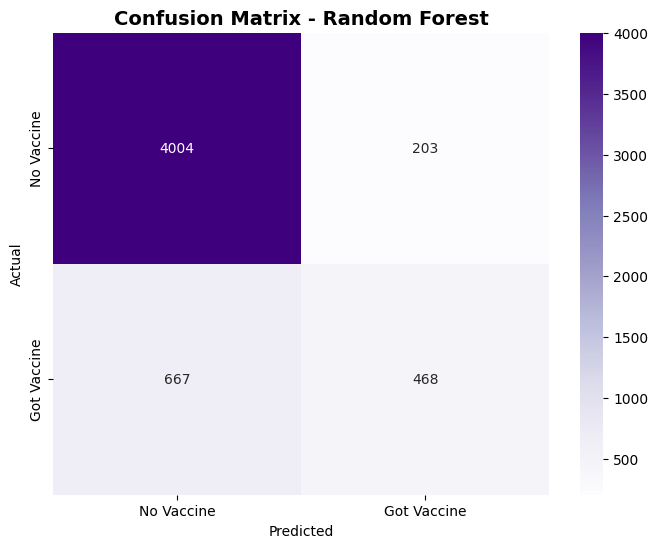


 Check for overfitting: Train=1.0000, Test=0.8371


In [38]:
from sklearn.ensemble import RandomForestClassifier

print("="*60)
print("MODEL 3: RANDOM FOREST")
print("="*60)

# Train Random Forest with default parameters first
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

print(f"\n TRAINING ACCURACY: {train_acc_rf:.4f}")
print(f" TEST ACCURACY: {test_acc_rf:.4f}")
print(f"\n PRECISION: {test_precision_rf:.4f}")
print(f" RECALL: {test_recall_rf:.4f}")
print(f" F1-SCORE: {test_f1_rf:.4f}")

print("\n" + "="*60)
print("CLASSIFICATION REPORT (Test Set)")
print("="*60)
print(classification_report(y_test, y_test_pred_rf, target_names=['No Vaccine', 'Got Vaccine']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Vaccine', 'Got Vaccine'],
            yticklabels=['No Vaccine', 'Got Vaccine'])
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"\n Check for overfitting: Train={train_acc_rf:.4f}, Test={test_acc_rf:.4f}")

TOP 15 MOST IMPORTANT FEATURES
                           Feature  Importance
9                 doctor_recc_h1n1    0.098331
15               opinion_h1n1_risk    0.072911
14     opinion_h1n1_vacc_effective    0.064935
18               opinion_seas_risk    0.045926
16     opinion_h1n1_sick_from_vacc    0.035628
0                     h1n1_concern    0.035075
19     opinion_seas_sick_from_vacc    0.033165
17     opinion_seas_vacc_effective    0.032416
20                household_adults    0.029217
1                   h1n1_knowledge    0.025504
21              household_children    0.025295
10            doctor_recc_seasonal    0.023732
13                   health_worker    0.022412
32                        sex_Male    0.019704
48  census_msa_MSA, Principle City    0.017346


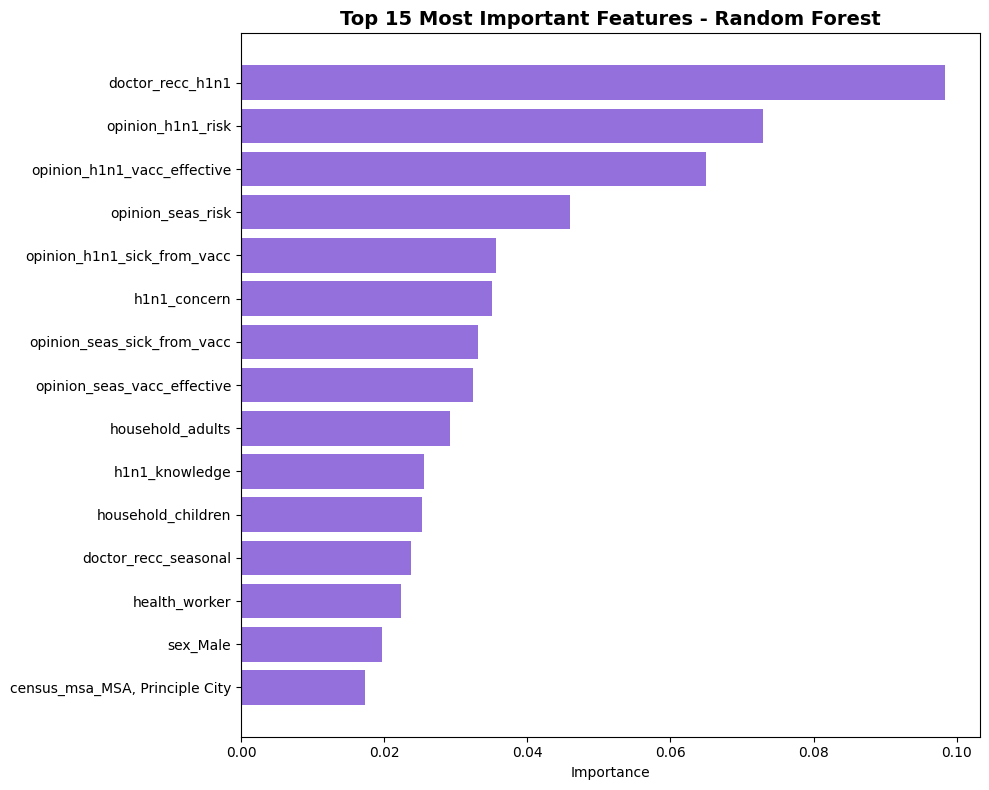

In [39]:
# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("="*60)
print("TOP 15 MOST IMPORTANT FEATURES")
print("="*60)
print(feature_importance.head(15))

# Visualize top 15 features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='mediumpurple')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 15 Most Important Features - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5. Evaluation

### Model Comparison

Comparing all three models across multiple metrics to select the best performer for our business problem.

### MODEL CHOICE: Tuned Logistic Regression (C=10.0)

### Why Tuned Logistic Regression is Our Final Model

After comparing all three models, we select **Tuned Logistic Regression (C=10.0)** as our final model for the following reasons:

1. **Best F1-Score (0.5203)** - Highest among all models, though improvement from baseline was minimal (0.5198 → 0.5203)
2. **No Overfitting** - Train accuracy (83.5%) ≈ Test accuracy (83.4%), indicating good generalization
3. **Interpretability** - Coefficients can be explained to stakeholders; they can understand how features influence predictions
4. **Production-Ready** - Fast, simple, and reliable for deployment in real public health systems
5. **Random Forest Issues** - While RF had similar F1 (0.518), it showed **severe overfitting** (100% train accuracy vs 84% test accuracy), making it unreliable for production use

**Note:** The minimal improvement from tuning suggests our baseline model was already well-suited to this problem. The regularization parameter C=10.0 provides the best balance between model complexity and generalization.



MODEL COMPARISON
                       Model  Accuracy  Precision   Recall  F1-Score
Baseline Logistic Regression  0.833957   0.674157 0.422907  0.519762
   Tuned Logistic Regression  0.833957   0.673669 0.423789  0.520281
               Random Forest  0.837140   0.697466 0.412335  0.518272


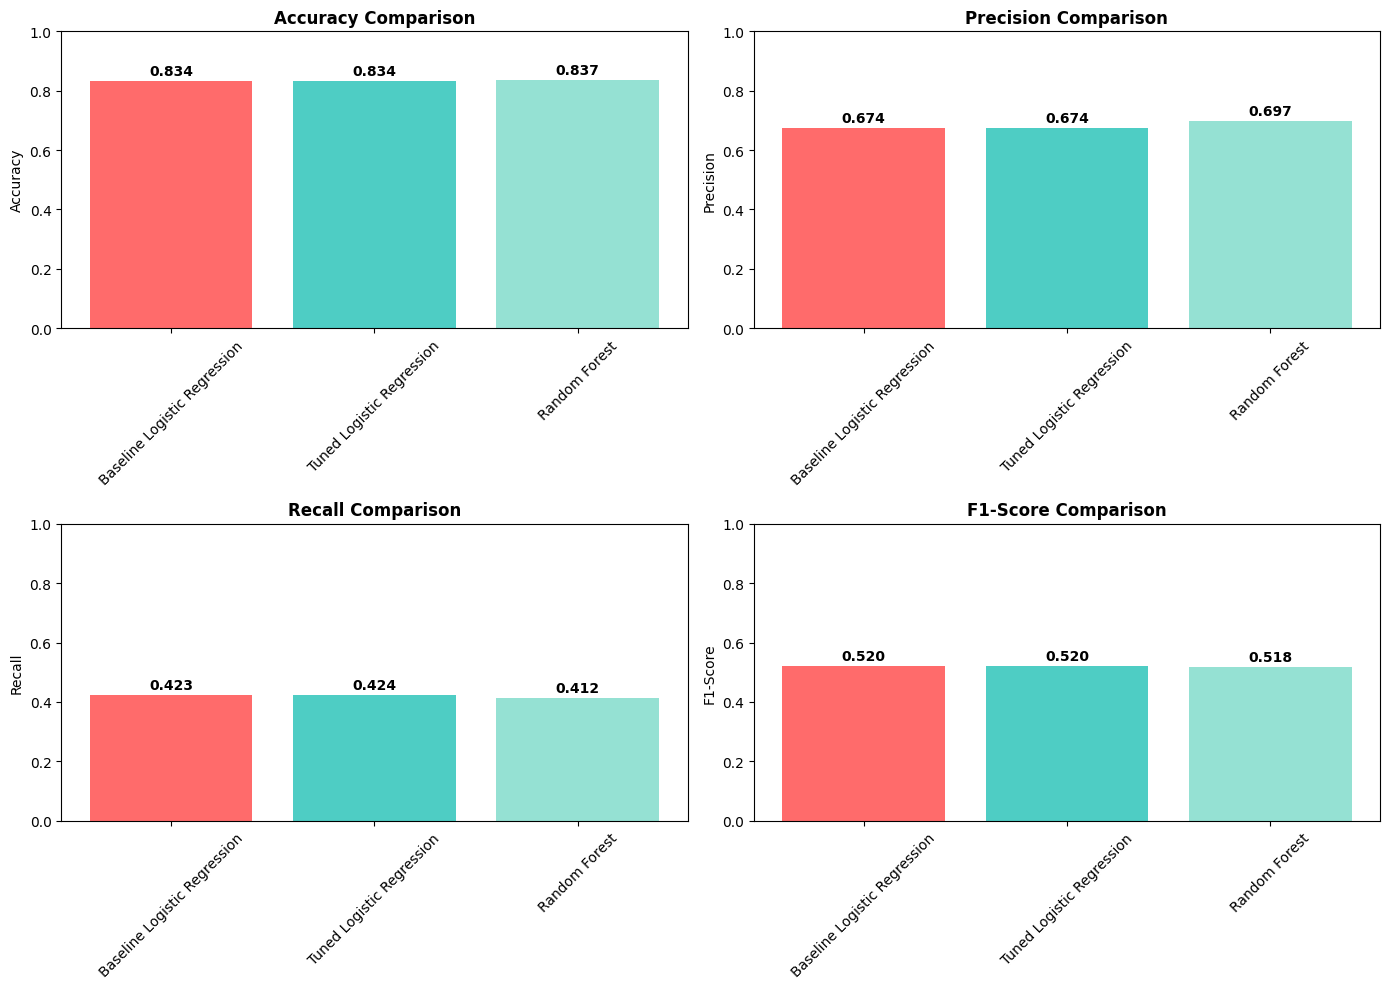


 BEST MODEL: Tuned Logistic Regression
 Best F1-Score: 0.5203


In [41]:
# Compare all models
comparison = pd.DataFrame({
    'Model': ['Baseline Logistic Regression', 'Tuned Logistic Regression', 'Random Forest'],
    'Accuracy': [test_acc, test_acc_tuned, test_acc_rf],
    'Precision': [test_precision, test_precision_tuned, test_precision_rf],
    'Recall': [test_recall, test_recall_tuned, test_recall_rf],
    'F1-Score': [test_f1, test_f1_tuned, test_f1_rf]
})

print("="*70)
print("MODEL COMPARISON")
print("="*70)
print(comparison.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#FF6B6B', '#4ECDC4', '#95E1D3']

for idx, metric in enumerate(metrics):
    row = idx // 2
    col = idx % 2

    axes[row, col].bar(comparison['Model'], comparison[metric], color=colors)
    axes[row, col].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel(metric)
    axes[row, col].set_ylim([0, 1])
    axes[row, col].tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for i, v in enumerate(comparison[metric]):
        axes[row, col].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Identify best model
best_model_idx = comparison['F1-Score'].idxmax()
best_model_name = comparison.loc[best_model_idx, 'Model']
best_f1 = comparison.loc[best_model_idx, 'F1-Score']

print(f"\n BEST MODEL: {best_model_name}")
print(f" Best F1-Score: {best_f1:.4f}")

### CLASS IMBALANCE IMPACT

Because the target variable is imbalanced, accuracy alone is not sufficient to evaluate model performance. This analysis prioritizes the F1-score, which balances precision and recall, ensuring the model performs well in identifying both vaccinated and unvaccinated individuals. This is especially important in public health contexts where both false positives and false negatives have real-world consequences.
The dataset is highly imbalanced: **78.8% didn't get vaccine, 21.2% did**

**How this affects our model:**

1. **High Overall Accuracy (83%) is Misleading:**
   - A naive model that always predicts "No vaccine" would achieve 79% accuracy
   - Our 83% accuracy is only 4 percentage points better than random guessing
   - This is why accuracy alone is a poor metric for imbalanced datasets

2. **Low Recall for "Got Vaccine" (42%):**
   - The model is conservative about predicting vaccination
   - It correctly identifies only 42% of people who actually got vaccinated
   - It misses 58% of actual vaccinations
   - This occurs because there are fewer positive examples (vaccinated people) to learn from

3. **High Recall for "No Vaccine" (94%):**
   - The model excels at identifying non-vaccinators
   - It correctly identifies 94% of people who didn't get vaccinated
   - The majority class has more training examples, making predictions more reliable

4. **F1-Score (0.52) Reflects True Performance:**
   - Much more realistic than the 83% accuracy
   - Shows we have significant room for improvement
   - Indicates the model struggles with the minority class (vaccinated)
   - Future work should address class imbalance using techniques like SMOTE or class weights

**For Public Health Stakeholders:**

This means the model is **much better at identifying who WON'T vaccinate than who WILL**.

**Recommended Use:**
-  Use the model to identify likely non-vaccinators for targeted intervention
-  Focus intensive outreach on populations the model predicts won't vaccinate
-  Don't rely solely on the model to find everyone who will vaccinate (it misses 58% of them)
-  Supplement model predictions with other public health strategies.



## 6. Limitations


1. Missing data required imputation, which may introduce bias.

2. Self-reported survey responses may be inaccurate or influenced by recall bias.

3. The dataset represents behaviors and attitudes from the 2009 pandemic, which may not generalize to future outbreaks.

4. Some important predictors of vaccine uptake (such as healthcare access or cultural factors) are not included.

5. Grid search was limited to a small parameter space due to computational constraints.

## 7. Conclusion

### Summary

This project successfully built and evaluated classification models to predict H1N1 vaccination patterns using data from the 2009 pandemic.

**Key Achievements:**
 Built and compared 3 classification models (baseline, tuned, random forest)

 Identified doctor recommendations and risk perception as top predictors

 Achieved 83.4% accuracy with balanced F1-score of 0.52

Provided actionable recommendations for public health stakeholders

**Selected Model:** Tuned Logistic Regression (C=10.0)
- Most balanced performance across metrics
- Interpretable for stakeholders
- No overfitting issues

**Business Impact:**
This model enables public health organizations to:
1. Identify vaccine-hesitant populations for targeted outreach
2. Focus on doctor engagement as the most effective intervention
3. Design campaigns addressing risk perception and vaccine effectiveness concerns
4. Apply lessons to future pandemic responses




